In [1]:
import sys
sys.path.append('gpib_instrument_control/')
import gpib_instrument_control.racal_dana_6000
import gpib_instrument_control.hp_3478a
import voltage_generator
import numpy as np
import time
from matplotlib import pyplot as plt

rd6000 = gpib_instrument_control.racal_dana_6000.RacalDana6000()
hp3478 = gpib_instrument_control.hp_3478a.Hp3478A()

vg = voltage_generator.VoltageGenerator("/dev/ttyUSB2")


Waiting for init... Done


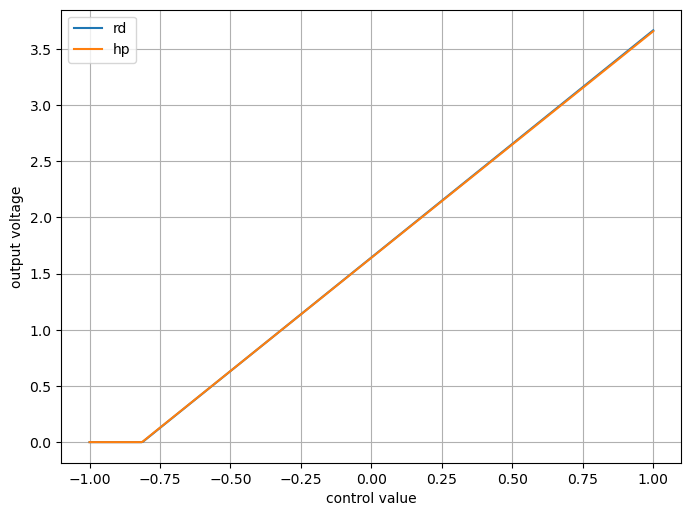

In [2]:
vr = []
vh = []
vs = np.linspace(-1, 1, 500)
for i in vs:
    vg.setA(i)
    vg.setB(i)
    #time.sleep(1)
    for j in range(3):
        rd6000.readValue()
        hp3478.readValue()
    vr.append(rd6000.readValue())
    vh.append(hp3478.readValue())
    
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(vs, vr, label='rd')
plt.plot(vs, vh, label='hp')
plt.grid(True)
plt.xlabel("control value")
plt.ylabel("output voltage")
plt.legend()

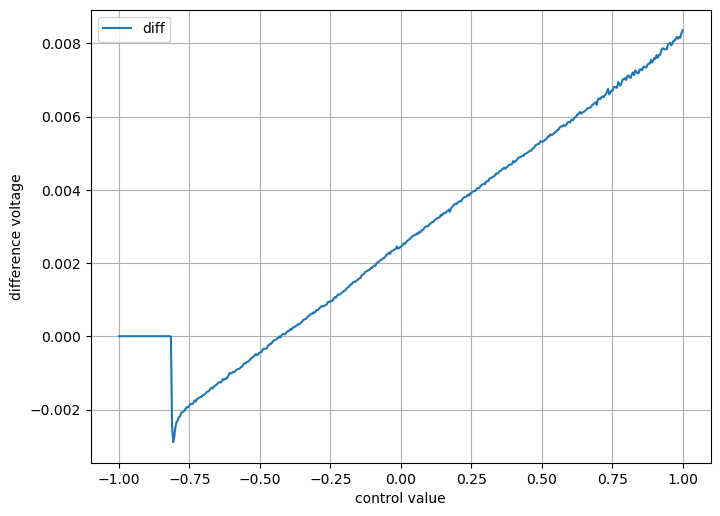

In [3]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(vs, np.array(vr)-vh, label='diff')
plt.grid(True)
plt.xlabel("control value")
plt.ylabel("difference voltage")
plt.legend()

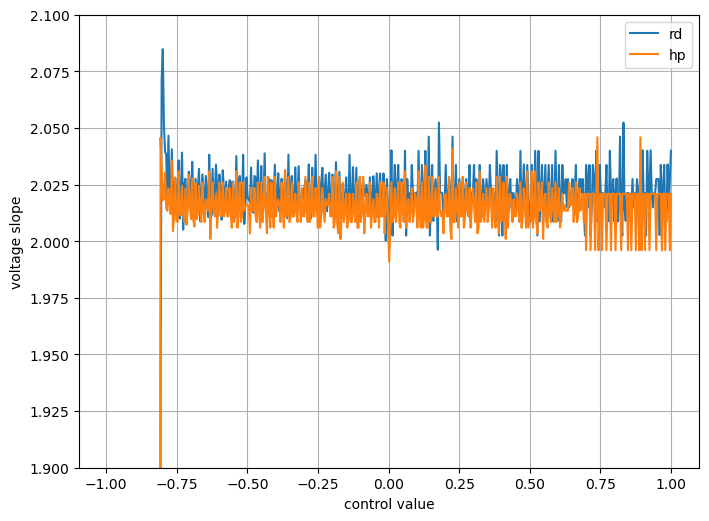

In [6]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(vs[1:], np.diff(vr)/np.diff(vs), label='rd')
plt.plot(vs[1:], np.diff(vh)/np.diff(vs), label='hp')
plt.grid(True)
plt.xlabel("control value")
plt.ylabel("voltage slope")
plt.ylim([1.9, 2.1])
plt.legend()